

# **1. THE PROBLEM**


- The most common way to measure scoring in the NBA (National Basketball Association) is through a statistic called points per game. This statistic is calculated by taking the total points a player scored throughout the season and dividing it by the number of games played.
- This statistic is great for getting a rough idea of how good a player is at scoring, **but the issue with this stat that it is not standarized.** A player can boost their points per game (ppg) by taking a lot of shot attempts, playing more minutes than the average player, etc.
***This project seeks to fix this problem by calculating a new, unique, and intuitive statistic called true points per possession (tppp) which seeks to improve upon points per game by standardizing it.**
- After calcualting this new statistic, I will be testing its effectiveness with regression analysis.
- [This youtube video](https://www.youtube.com/watch?v=6WMNEt7gIHE&t=264s) made by me sums up the points of this notebook without code.



**- The first step is to import the dataset as well as all of the libraries that I will use for my analysis.**

In [ ]:
from google.colab import drive # link my google drive to this colab notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd # pandas is the main library I will be preforming my analysis with
import matplotlib.pyplot as plt # for visualization
import numpy as np # for regression analysis
import seaborn as sns # Alternative library for visualization


# **2. DATA CLEANING**

- **The spreadsheet that I am using is the game log of Damian Lillard since 2021. I chose to use the Trailblazers Point Guard Damian Lillard because he rarely misses games, and has a very high points per game.**
- **The data set looks like this:**

In [ ]:
dataframe = pd.read_excel('/content/drive/MyDrive/Dame Lillard 2021 Game Log.xlsx') # put the spreadsheet into a data frame
dataframe.head(8)

,Unnamed: 0,NAME,DATE,TM,Unnamed: 4,OPP,RESULT,TEAM FGA,PTS/POSS,PTS,...,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,PF,'+/-
0,Damian Lillard,Damian Lillard,2023-03-22,POR POR,@,UTA UTA,W,93,1.11,30,...,19,42.1,2,10,20.0,12,14,85.7,1,18
1,Damian Lillard,Damian Lillard,2023-03-19,POR POR,vs,LAC LAC,L,82,0.87,21,...,17,23.5,1,8,12.5,12,13,92.3,0,-20
2,Damian Lillard,Damian Lillard,2023-03-17,POR POR,vs,BOS BOS,L,79,1.27,41,...,23,52.2,6,15,40.0,11,14,78.6,3,-14
3,Damian Lillard,Damian Lillard,2023-03-14,POR POR,vs,NYK NYK,L,99,1.27,38,...,26,42.3,8,17,47.1,8,9,88.9,3,-5
4,Damian Lillard,Damian Lillard,2023-03-10,POR POR,@,PHI PHI,L,80,1.03,22,...,15,40.0,2,8,25.0,8,8,100.0,2,3
5,Damian Lillard,Damian Lillard,2023-03-08,POR POR,@,BOS BOS,L,82,1.09,27,...,16,43.8,2,8,25.0,11,11,100.0,2,-16
6,Damian Lillard,Damian Lillard,2023-03-06,POR POR,@,DET DET,W,78,0.89,31,...,28,35.7,6,14,42.9,5,6,83.3,0,8
7,Damian Lillard,Damian Lillard,2023-03-05,POR POR,@,ORL ORL,W,83,1.18,41,...,25,40.0,4,16,25.0,17,20,85.0,2,10


**2A.) The spreadsheet came with a duplicate name column, so I must drop it.**




In [ ]:
dataframe = dataframe.drop(dataframe.columns[0], axis=1) # clear the duplicate name column

**2B.) The spreadsheet has 'W' for wins and 'L' for losses. Python/Pandas works much better if we make this binary (1 and 0), so we are making W = 1, and L = 0. Additionally, there are some random spaces in this 'RESULT' Column, so we must account for this as well.**

In [ ]:
dataframe['RESULT'] = dataframe['RESULT'].replace({'W':1,'L':0,'W ':1,'L ':0}) # replaces W with 0 and L with 1 to make analysis easier later on

**2C.) I am making a '% OF TEAM SHOTS TAKEN' column that will be used later for my analysis. More on this later**

In [ ]:
dataframe['% OF TEAM SHOTS TAKEN'] = dataframe['FGA'] / dataframe['TEAM FGA'] # creates the % of team shots taken statistic that is needed to calculate TPPP


In [ ]:
dataframe['% OF TEAM SHOTS TAKEN'].mean()

0.23297213386153887

**2D.) Here I am calcualting a statistic called Points Per Posession. More on this in the next section**

---



In [ ]:
dataframe['PTS/POSS'] = dataframe['PTS'] / dataframe['POSS'] # creates the pts/team poss column


In [ ]:
dataframe['PTS/POSS'].mean() # mean pts/poss of damian lillard

0.29823958705390335

In [ ]:
dataframe.head(5)

,NAME,DATE,TM,Unnamed: 4,OPP,RESULT,TEAM FGA,PTS/POSS,PTS,POSS,...,FG%,3PM,3PA,3P%,FTM,FTA,FT%,PF,'+/-,% OF TEAM SHOTS TAKEN
0,Damian Lillard,2023-03-22,POR POR,@,UTA UTA,1,93,0.284091,30,105.6,...,42.1,2,10,20.0,12,14,85.7,1,18,0.204301
1,Damian Lillard,2023-03-19,POR POR,vs,LAC LAC,0,82,0.229258,21,91.6,...,23.5,1,8,12.5,12,13,92.3,0,-20,0.207317
2,Damian Lillard,2023-03-17,POR POR,vs,BOS BOS,0,79,0.411647,41,99.6,...,52.2,6,15,40.0,11,14,78.6,3,-14,0.291139
3,Damian Lillard,2023-03-14,POR POR,vs,NYK NYK,0,99,0.381910,38,99.5,...,42.3,8,17,47.1,8,9,88.9,3,-5,0.262626
4,Damian Lillard,2023-03-10,POR POR,@,PHI PHI,0,80,0.235546,22,93.4,...,40.0,2,8,25.0,8,8,100.0,2,3,0.187500


# **3. DATA ANALYSIS AND VISUALIZATION**

- I have finished the preliminary cleaning stage, so now it is time to ***fix the stated problem.***
- As I mentioned previously, the issue with the points per game is that it is not standardized. A player can jack up their points per game by playing more minutes per game than their competitors, and by shooting more shots than they should.
- **Lets look at Damian Lillard on December 30 of 2021.**

In [ ]:
df = dataframe.loc[35]
df1 = df.to_frame()
df1 = df1.reset_index()
print(df1)

                    index                   35
0                    NAME       Damian Lillard
1                    DATE  2022-12-30 00:00:00
2                      TM              POR POR
3              Unnamed: 4                    @
4                     OPP              GSW GSW
5                  RESULT                    0
6                TEAM FGA                   91
7                PTS/POSS             0.361702
8                     PTS                   34
9                    POSS                 94.0
10                    MIN                   42
11                    REB                    8
12                    AST                    5
13                    STL                    0
14                    BLK                    1
15                    TOV                    3
16                    FGM                   12
17                    FGA                   29
18                    FG%                 41.4
19                    3PM                    4
20           

- He scored 34 points (8th row) which seems to be an impressive amount considering the highest points per game scorer that season (Giannis Antetokounmpo) averaged 29.9 points per game.
- However, what 34 points does not tell us is that** he played 42 minutes** (10th row) **which is 6.2 minutes more than his average that season.**
- Additionally, **he attempted 29 shots** (17th row), **which was 10 more than his average.**
- All of a sudden, his 34 points, which was 6.2 points higher than his average, **does not seem as impressive when factoring in that he played 42 minutes and took 29 shots.**



Slope: 0.814362692921767, Intercept: -0.15937111938976092, R-value: 0.33285154529138833


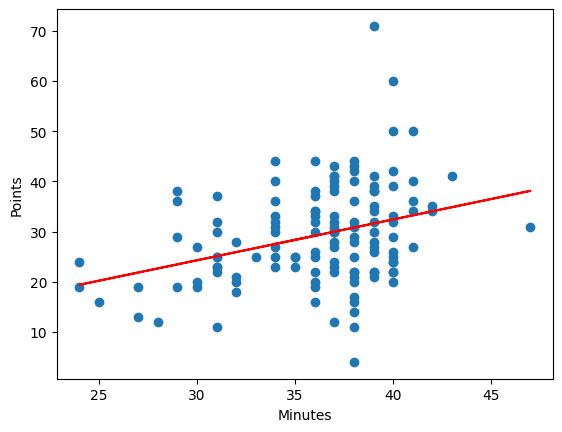

In [ ]:
x = dataframe['MIN']
y = dataframe['PTS']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Minutes')
plt.ylabel('Points')
plt.show()

- As you can see here, there is a ***clear correlation between minutes and points.***
- The obvious solution to this is to measure points ***per possession*** rather than per game.
- Doing so allows us to ***standardize*** this statistic.
- Factors such as minutes played and shots attempted do not matter, as we are simply measuring how many points a player scores ***per possession.***
- I can prove that points per possession has a strong correlation with winning than points per game with regressional analysis.

**Here, I am regressing points scored per game ('PTS') on Wins ('Result')** **bold text**

Slope: 3.47186147186146, Intercept: 27.57575757575759, R-value: 0.17591088053834217


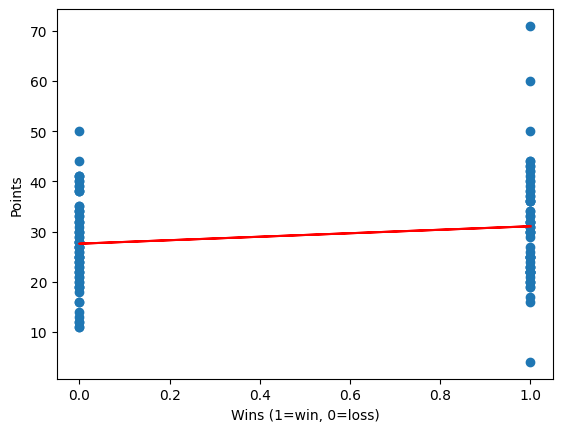

In [ ]:
x = dataframe['RESULT']
y = dataframe['PTS']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Wins (1=win, 0=loss)')
plt.ylabel('Points')
plt.show()

**Here, I am regressing points per possession per game ('PTS/POSS') on Wins ('Result')**

Slope: 0.038311890139531735, Intercept: 0.2795291290787832, R-value: 0.18335307203598475


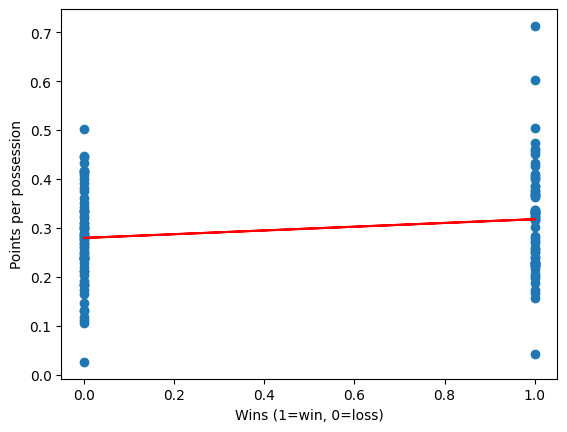

In [ ]:
x = dataframe['RESULT']
y = dataframe['PTS/POSS']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Wins (1=win, 0=loss)')
plt.ylabel('Points per possession')
plt.show()

- As you can see, **the correlation coefficient/r-value is higher for the points per possession regression than the points per game regression (0.17591 vs 0.18335).**
- This means that there is a stronger correlation between **points per possession and winning** than there is with **points per game and winning.**
- However, the difference in the correlation coeffcients are quite small (~0.00744). **This is almost negligible**, so what is the issue?
- The issue is that while points per possession measures scoring better than points per game as evident by the regression, **this is still a flawed statistic.**
- This is because **points per game does not take into account the percentage of team shots taken.**
- **If a player takes a large percentage of their team's shots (say 50%) then their points per possession skyrockets.**
- Lets look at Damian Lillard once again. If we regress points per possession on percentage of team shots taken, we see an obvious correlation


Slope: 0.3684403886261656, Intercept: 0.12308862450369154, R-value: 0.680079507926203


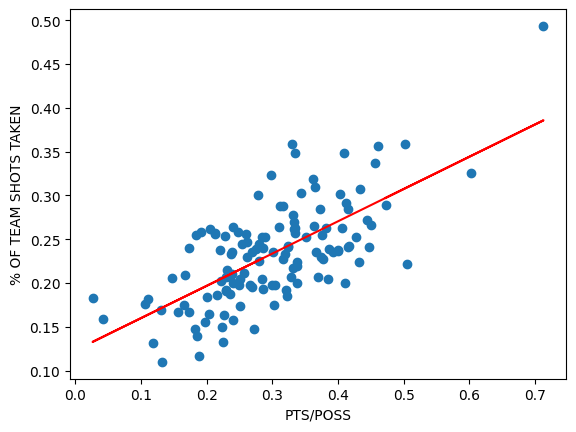

In [ ]:
x = dataframe['PTS/POSS']
y = dataframe['% OF TEAM SHOTS TAKEN']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('PTS/POSS')
plt.ylabel('% OF TEAM SHOTS TAKEN')
plt.show()

- The correlation coefficient is .68008 which **implies a strong positive correlation between points per possession and % of team shots taken.** So how do we fix this?
- The solution is by multiplying points per possession by (1-% of team shots taken).
- Doing this evens out the effect that the % of team shots taken has on points per possession
- This is what I am now calling **True Points Per Possession.**

In [ ]:
dataframe['TRUE POINTS PER POSSESSION'] = dataframe['PTS/POSS'] * (1-dataframe['% OF TEAM SHOTS TAKEN']) # creates the % of team shots taken statistic that is needed to calculate TPPP
dataframe.head(3)

,NAME,DATE,TM,Unnamed: 4,OPP,RESULT,TEAM FGA,PTS/POSS,PTS,POSS,...,3PM,3PA,3P%,FTM,FTA,FT%,PF,'+/-,% OF TEAM SHOTS TAKEN,TRUE POINTS PER POSSESSION
0,Damian Lillard,2023-03-22,POR POR,@,UTA UTA,1,93,0.284091,30,105.6,...,2,10,20.0,12,14,85.7,1,18,0.204301,0.226051
1,Damian Lillard,2023-03-19,POR POR,vs,LAC LAC,0,82,0.229258,21,91.6,...,1,8,12.5,12,13,92.3,0,-20,0.207317,0.181729
2,Damian Lillard,2023-03-17,POR POR,vs,BOS BOS,0,79,0.411647,41,99.6,...,6,15,40.0,11,14,78.6,3,-14,0.291139,0.291800


In [ ]:
dataframe['TRUE POINTS PER POSSESSION'].mean()

0.22473865699340137

Slope: 0.02895783992387559, Intercept: 0.2105964561003459, R-squared: 0.2131356269092297


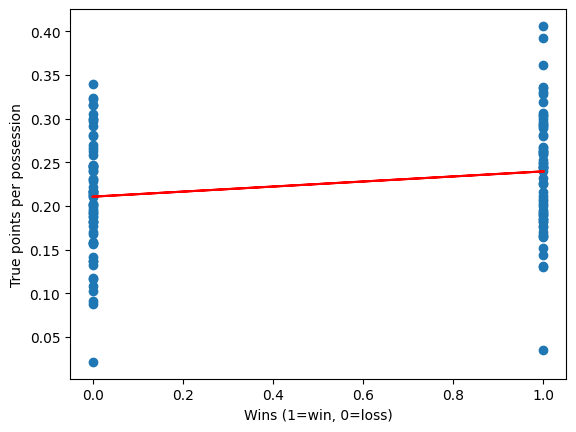

In [ ]:
x = dataframe['RESULT']
y = dataframe['TRUE POINTS PER POSSESSION']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Wins (1=win, 0=loss)')
plt.ylabel('True points per possession')
plt.show()

- As you can see, the correlation coefficient in this regression is greater than any correlation coefficient we have seen. (0.21316 > 0.18335 > 0.17591).
- This proves that true points per posession has a **greater impact on winning games than both points per posession AND points per game.**

- Here is **side-by-side visualization** of by **how much TPPP outperforms Points per game.**

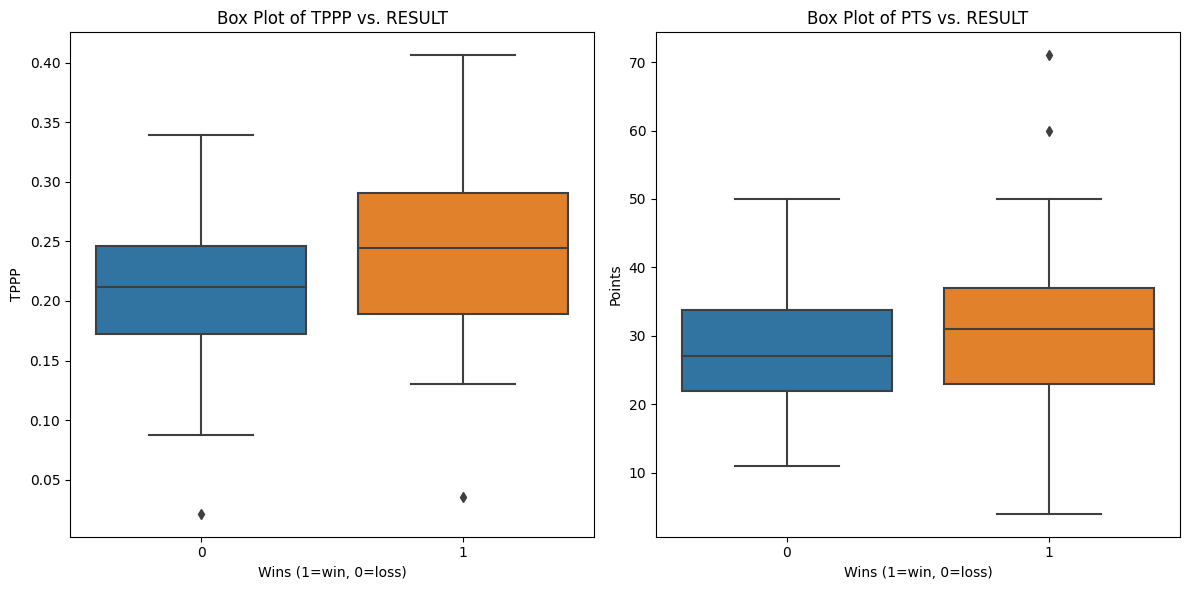

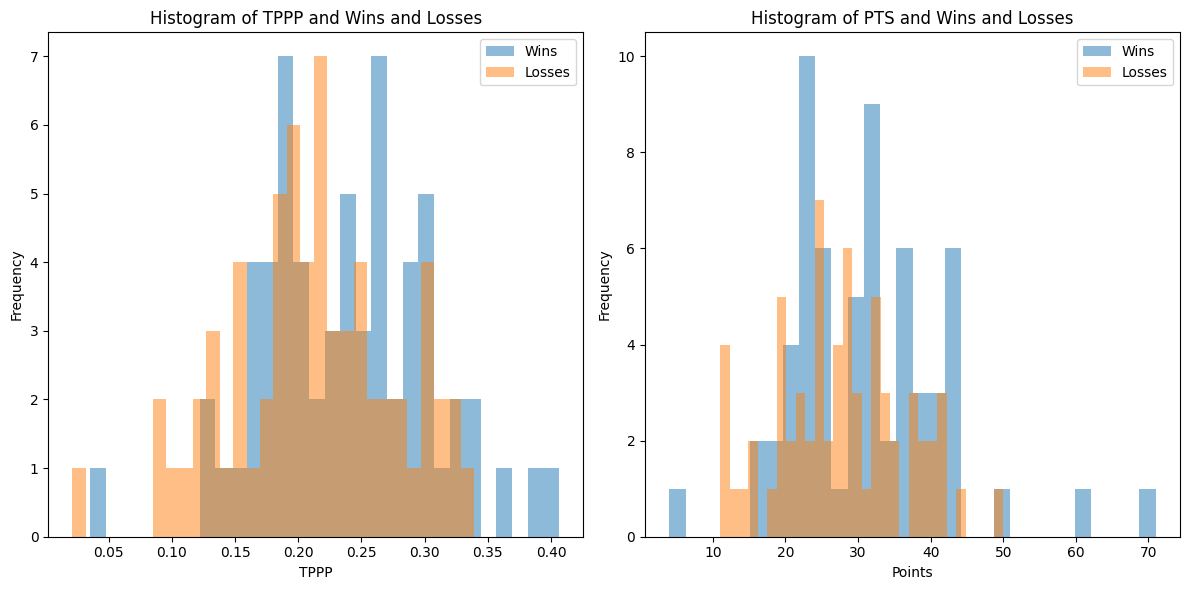

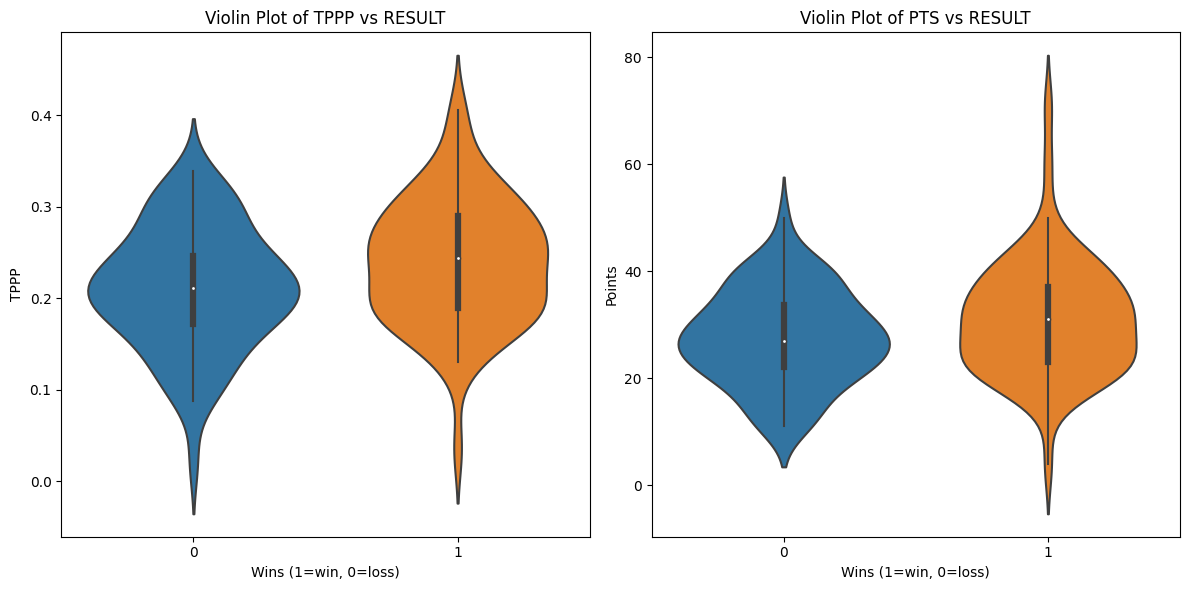

In [ ]:
# VISUALIZATION

# Create boxplot for TPPP
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # Create two subplots side by side
sns.boxplot(x='RESULT', y='TRUE POINTS PER POSSESSION', data=dataframe, ax=ax[0])
ax[0].set_xlabel('Wins (1=win, 0=loss)')
ax[0].set_ylabel('TPPP')
ax[0].set_title('Box Plot of TPPP vs. RESULT')

# Create boxplot for PTS
sns.boxplot(x='RESULT', y='PTS', data=dataframe, ax=ax[1])
ax[1].set_xlabel('Wins (1=win, 0=loss)')
ax[1].set_ylabel('Points')
ax[1].set_title('Box Plot of PTS vs. RESULT')

# Display the plots
plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()


# Create histogram for TPPP
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # Create two subplots side by side
win_TPPP = dataframe[dataframe['RESULT'] == 1]['TRUE POINTS PER POSSESSION']
loss_TPPP = dataframe[dataframe['RESULT'] == 0]['TRUE POINTS PER POSSESSION']
ax[0].hist(win_TPPP, bins=30, alpha=0.5, label='Wins')
ax[0].hist(loss_TPPP, bins=30, alpha=0.5, label='Losses')
ax[0].set_xlabel('TPPP')
ax[0].set_ylabel('Frequency')
ax[0].legend(loc='upper right')
ax[0].set_title('Histogram of TPPP and Wins and Losses')

# Create histogram for PTS
win_pts = dataframe[dataframe['RESULT'] == 1]['PTS']
loss_pts = dataframe[dataframe['RESULT'] == 0]['PTS']
ax[1].hist(win_pts, bins=30, alpha=0.5, label='Wins')
ax[1].hist(loss_pts, bins=30, alpha=0.5, label='Losses')
ax[1].set_xlabel('Points')
ax[1].set_ylabel('Frequency')
ax[1].legend(loc='upper right')
ax[1].set_title('Histogram of PTS and Wins and Losses')
plt.tight_layout()  # Ensures that the plots do not overlap
plt.show() # Display the plots


# Create violin plot for TPPP
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # Create two subplots side by side
sns.violinplot(x='RESULT', y='TRUE POINTS PER POSSESSION', data=dataframe, ax=ax[0], alpha=0.5)
ax[0].set_xlabel('Wins (1=win, 0=loss)')
ax[0].set_ylabel('TPPP')
ax[0].set_title('Violin Plot of TPPP vs RESULT')

# Create violin plot for PTS
sns.violinplot(x='RESULT', y='PTS', data=dataframe, ax=ax[1])
ax[1].set_xlabel('Wins (1=win, 0=loss)')
ax[1].set_ylabel('Points')
ax[1].set_title('Violin Plot of PTS vs RESULT')
plt.tight_layout()  # Ensures that the plots do not overlap
plt.show() # Display the plots


Slope: 0.4154011480851201, Intercept: 0.13961543772737192, R-value: 0.4985685439434858


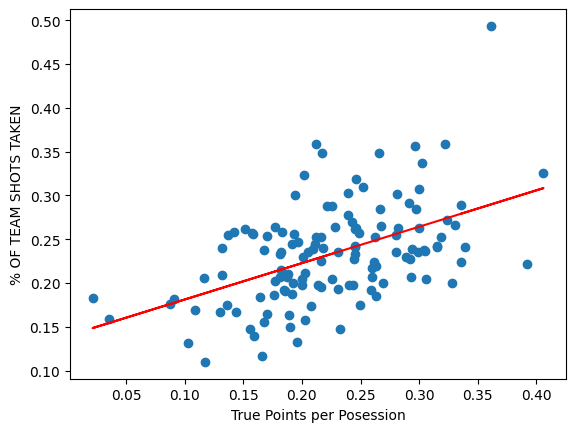

In [ ]:
x = dataframe['TRUE POINTS PER POSSESSION']
y = dataframe['% OF TEAM SHOTS TAKEN']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('True Points per Posession')
plt.ylabel('% OF TEAM SHOTS TAKEN')
plt.show()

- As you can see here, there is still a noticeable correlation between true points per posession and % of team shots taken, but the correlation coefficient is significantly less (0.68007 - 0.49857 ~= 0.1815)
- So clearly this partly fixes the issue of players who take a large percentage of their team's shots.

In [ ]:
dataframe['TRUE POINTS PER POSSESSION 2'] = dataframe['TRUE POINTS PER POSSESSION'] * dataframe['FG%']
dataframe['TRUE POINTS PER POSSESSION 2'].mean()

10.508113268391718

Slope: 2.5242910731001715, Intercept: 9.275319953621871, R-value: 0.23856876723799647


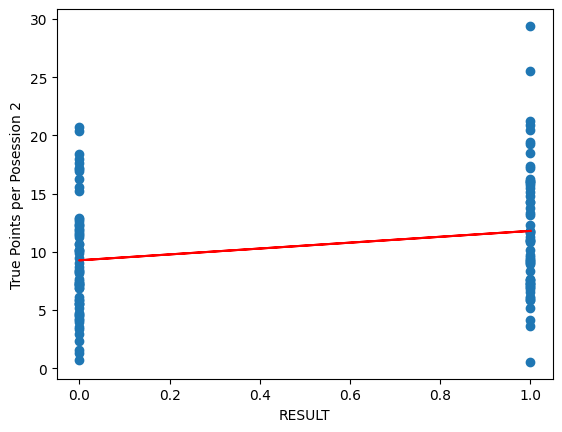

In [ ]:
x = dataframe['RESULT']
y = dataframe['TRUE POINTS PER POSSESSION 2']
coefficients = np.polyfit(x,y,1)
slope, intercept = coefficients
correlation_coefficient = np.corrcoef(x, y)[0,1]

print(f'Slope: {slope}, Intercept: {intercept}, R-value: {correlation_coefficient}')

# Generate predicted y values for the regression line
y_pred = slope * x + intercept

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('RESULT')
plt.ylabel('True Points per Posession 2')
plt.show()

# **4.) CONCLUSION**

- Points per game is a great stat for rough measurements of scoring in the NBA, but when closer analysis of players is needed, it has many misleading properties.
- Points per possession is a statistic that improves slightly on points per game by standardizing it, but there are still major flaws as players who take a large percentage of their team's shot attempts get a unproportional increase in their points per possession
- **My new statistic True Points Per Posession Improves on both of these stats by standardizing points per game, and reducing the impact that taking a large percentage of a team's shot attempts has on points per possession.**

*spreadsheets are from the following sources:*
1. www.statmuse.com (paid)
2. www.basketball-reference.com (free)
3. www.NBA.com (free)